# Analysis Energy/PE Spectra on Ar39 Pileups
In this notebook, we try to plot the spectrum of energy and pe detected of Ar39 Pileups (1, 2, ..., 7).

In [1]:
import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 18})

In [2]:
def load_dataframe_from_files(dirin, fileprefix):
    import glob
    files = glob.glob(os.path.join(dirin, fileprefix))
    print("[Info] Loading {}".format(files[0]))
    df = pd.read_csv(files[0], comment='#', index_col=False)
    for file in files[1:]:
        print("[Info] Loading {}".format(file))
        dftmp = pd.read_csv(file, comment='#', index_col=False)
        df = pd.concat([df, dftmp])
    df = df[df.pedetected > 0]    # remove zero detections
    df = df.groupby("eventnumber").sum()
    return df

In [3]:
# Aggregation of 4 Ar39 decays for each snapshot
dirin = os.path.join("..", "..", "Development", "Out", "T10us", "Ar39_1to7Pileups")
prefix_1Ar39_files = "Ar39_06142020_10M_Snapshots_T10000_DT10000_Grp1*csv"
prefix_3Ar39_files = "Ar39_06142020_10M_Snapshots_T10000_DT10000_Grp3*csv"
prefix_5Ar39_files = "Ar39_06142020_10M_Snapshots_T10000_DT10000_Grp5*csv"
prefix_7Ar39_files = "Ar39_06142020_10M_Snapshots_T10000_DT10000_Grp7*csv"

groupby_event_df1 = load_dataframe_from_files(dirin, prefix_1Ar39_files)
groupby_event_df3 = load_dataframe_from_files(dirin, prefix_3Ar39_files)
groupby_event_df5 = load_dataframe_from_files(dirin, prefix_5Ar39_files)
groupby_event_df7 = load_dataframe_from_files(dirin, prefix_7Ar39_files)

print("[Info] Loaded datasets (only non-zero detections), grouped by event")
print("[Info] 1 Ar39: {} events".format(len(groupby_event_df1)))
print("[Info] 3 Ar39: {} events".format(len(groupby_event_df3)))
print("[Info] 5 Ar39: {} events".format(len(groupby_event_df5)))
print("[Info] 7 Ar39: {} events".format(len(groupby_event_df7)))

[Info] Loading ../../Development/Out/T10us/Ar39_1to7Pileups/Ar39_06142020_10M_Snapshots_T10000_DT10000_Grp1_Seed123456789_Part1.csv
[Info] Loading ../../Development/Out/T10us/Ar39_1to7Pileups/Ar39_06142020_10M_Snapshots_T10000_DT10000_Grp1_Seed123456789_Part10.csv
[Info] Loading ../../Development/Out/T10us/Ar39_1to7Pileups/Ar39_06142020_10M_Snapshots_T10000_DT10000_Grp1_Seed123456789_Part11.csv
[Info] Loading ../../Development/Out/T10us/Ar39_1to7Pileups/Ar39_06142020_10M_Snapshots_T10000_DT10000_Grp1_Seed123456789_Part12.csv
[Info] Loading ../../Development/Out/T10us/Ar39_1to7Pileups/Ar39_06142020_10M_Snapshots_T10000_DT10000_Grp1_Seed123456789_Part13.csv
[Info] Loading ../../Development/Out/T10us/Ar39_1to7Pileups/Ar39_06142020_10M_Snapshots_T10000_DT10000_Grp1_Seed123456789_Part14.csv
[Info] Loading ../../Development/Out/T10us/Ar39_1to7Pileups/Ar39_06142020_10M_Snapshots_T10000_DT10000_Grp1_Seed123456789_Part15.csv
[Info] Loading ../../Development/Out/T10us/Ar39_1to7Pileups/Ar39_06142

[Info] Loading ../../Development/Out/T10us/Ar39_1to7Pileups/Ar39_06142020_10M_Snapshots_T10000_DT10000_Grp1_Seed123456789_Part7.csv
[Info] Loading ../../Development/Out/T10us/Ar39_1to7Pileups/Ar39_06142020_10M_Snapshots_T10000_DT10000_Grp1_Seed123456789_Part8.csv
[Info] Loading ../../Development/Out/T10us/Ar39_1to7Pileups/Ar39_06142020_10M_Snapshots_T10000_DT10000_Grp3_Seed123456789_Part1.csv
[Info] Loading ../../Development/Out/T10us/Ar39_1to7Pileups/Ar39_06142020_10M_Snapshots_T10000_DT10000_Grp3_Seed123456789_Part10.csv
[Info] Loading ../../Development/Out/T10us/Ar39_1to7Pileups/Ar39_06142020_10M_Snapshots_T10000_DT10000_Grp3_Seed123456789_Part11.csv
[Info] Loading ../../Development/Out/T10us/Ar39_1to7Pileups/Ar39_06142020_10M_Snapshots_T10000_DT10000_Grp3_Seed123456789_Part12.csv
[Info] Loading ../../Development/Out/T10us/Ar39_1to7Pileups/Ar39_06142020_10M_Snapshots_T10000_DT10000_Grp3_Seed123456789_Part13.csv
[Info] Loading ../../Development/Out/T10us/Ar39_1to7Pileups/Ar39_0614202

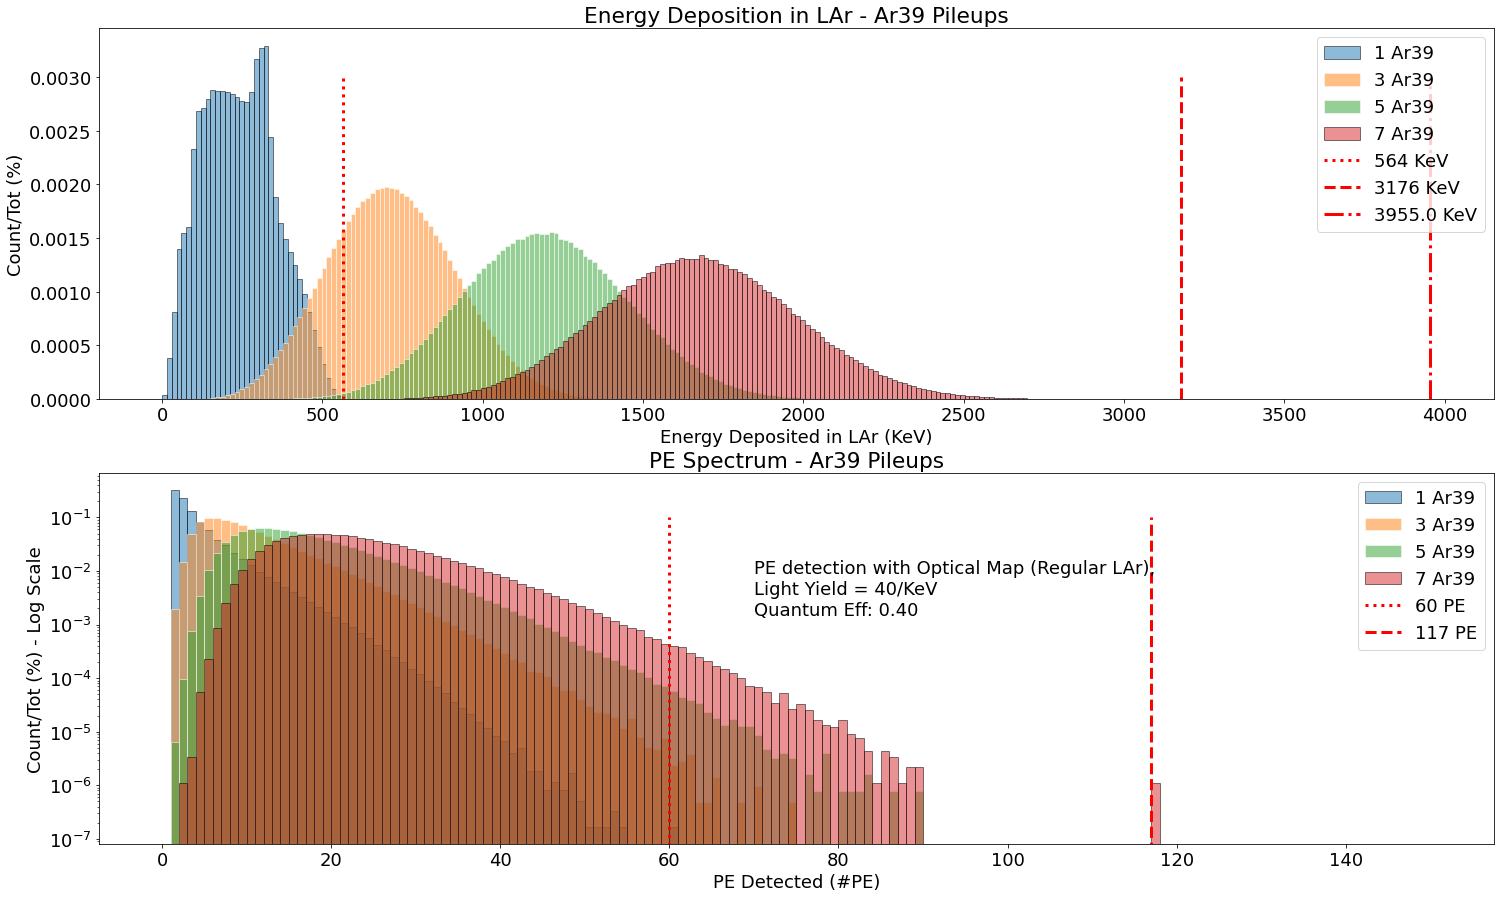

In [4]:
alpha=0.5
ar39_max_energy = 565
op_yield = 40
best_eff = 0.0092
quantum_eff = 0.4
ideal_max_energy = 7 * ar39_max_energy
ideal_max_npe = int(7 * ar39_max_energy * op_yield * best_eff * quantum_eff)

plt.subplot(2,1,1)
plt.title("Energy Deposition in LAr - Ar39 Pileups")
bins = np.linspace(0, 3000, 200)
plt.hist(groupby_event_df1.energydeposition, bins=bins, label="1 Ar39", density=True, edgecolor='k', alpha=alpha)
plt.hist(groupby_event_df3.energydeposition, bins=bins, label="3 Ar39", density=True, edgecolor='w', alpha=alpha)
plt.hist(groupby_event_df5.energydeposition, bins=bins, label="5 Ar39", density=True, edgecolor='w', alpha=alpha)
plt.hist(groupby_event_df7.energydeposition, bins=bins, label="7 Ar39", density=True, edgecolor='k', alpha=alpha)
plt.vlines(x=int(groupby_event_df1.energydeposition.max()), ymin=0, ymax=0.003, color='r', linestyles='dotted', linewidth=3, label="{} KeV".format(int(groupby_event_df1.energydeposition.max())))
plt.vlines(x=int(groupby_event_df7.energydeposition.max()), ymin=0, ymax=0.003, color='r', linestyles='dashed', linewidth=3, label="{} KeV".format(int(groupby_event_df7.energydeposition.max())))
plt.vlines(x=ideal_max_energy, ymin=0, ymax=0.003, color='r', linestyles='dashdot', linewidth=3, label="{:.1f} KeV".format(ideal_max_energy))
plt.xlabel("Energy Deposited in LAr (KeV)")
plt.ylabel("Count/Tot (%)")
plt.legend()

plt.subplot(2,1,2)
bins = np.linspace(0, 150, 151)
plt.hist(groupby_event_df1.pedetected, bins=bins, label="1 Ar39", density=True, edgecolor='k', alpha=alpha)
#plt.hist(groupby_event_df2.pedetected, bins=bins, label="2 Ar39", density=True, edgecolor='w', alpha=alpha)
plt.hist(groupby_event_df3.pedetected, bins=bins, label="3 Ar39", density=True, edgecolor='w', alpha=alpha)
#plt.hist(groupby_event_df4.pedetected, bins=bins, label="4 Ar39", density=True, edgecolor='w', alpha=alpha)
plt.hist(groupby_event_df5.pedetected, bins=bins, label="5 Ar39", density=True, edgecolor='w', alpha=alpha)
#plt.hist(groupby_event_df6.pedetected, bins=bins, label="6 Ar39", density=True, edgecolor='w', alpha=alpha)
plt.hist(groupby_event_df7.pedetected, bins=bins, label="7 Ar39", density=True, edgecolor='k', alpha=alpha)
plt.vlines(x=groupby_event_df1.pedetected.max(), ymin=0, ymax=0.1, color='r', linestyles='dotted', linewidth=3, label="{} PE".format(groupby_event_df1.pedetected.max()))
plt.vlines(x=groupby_event_df7.pedetected.max(), ymin=0, ymax=0.1, color='r', linestyles='dashed', linewidth=3, label="{} PE".format(groupby_event_df7.pedetected.max()))
#plt.vlines(x=ideal_max_npe, ymin=0, ymax=0.003, color='r', linestyles='dashdot', linewidth=3, label="{} PE".format(ideal_max_npe))
plt.title("PE Spectrum - Ar39 Pileups")
plt.xlabel("PE Detected (#PE)")
plt.ylabel("Count/Tot (%) - Log Scale")
plt.yscale('log')
plt.text(70, 0.0015, "PE detection with Optical Map (Regular LAr),\nLight Yield = 40/KeV\nQuantum Eff: 0.40")
plt.legend()
plt.show()

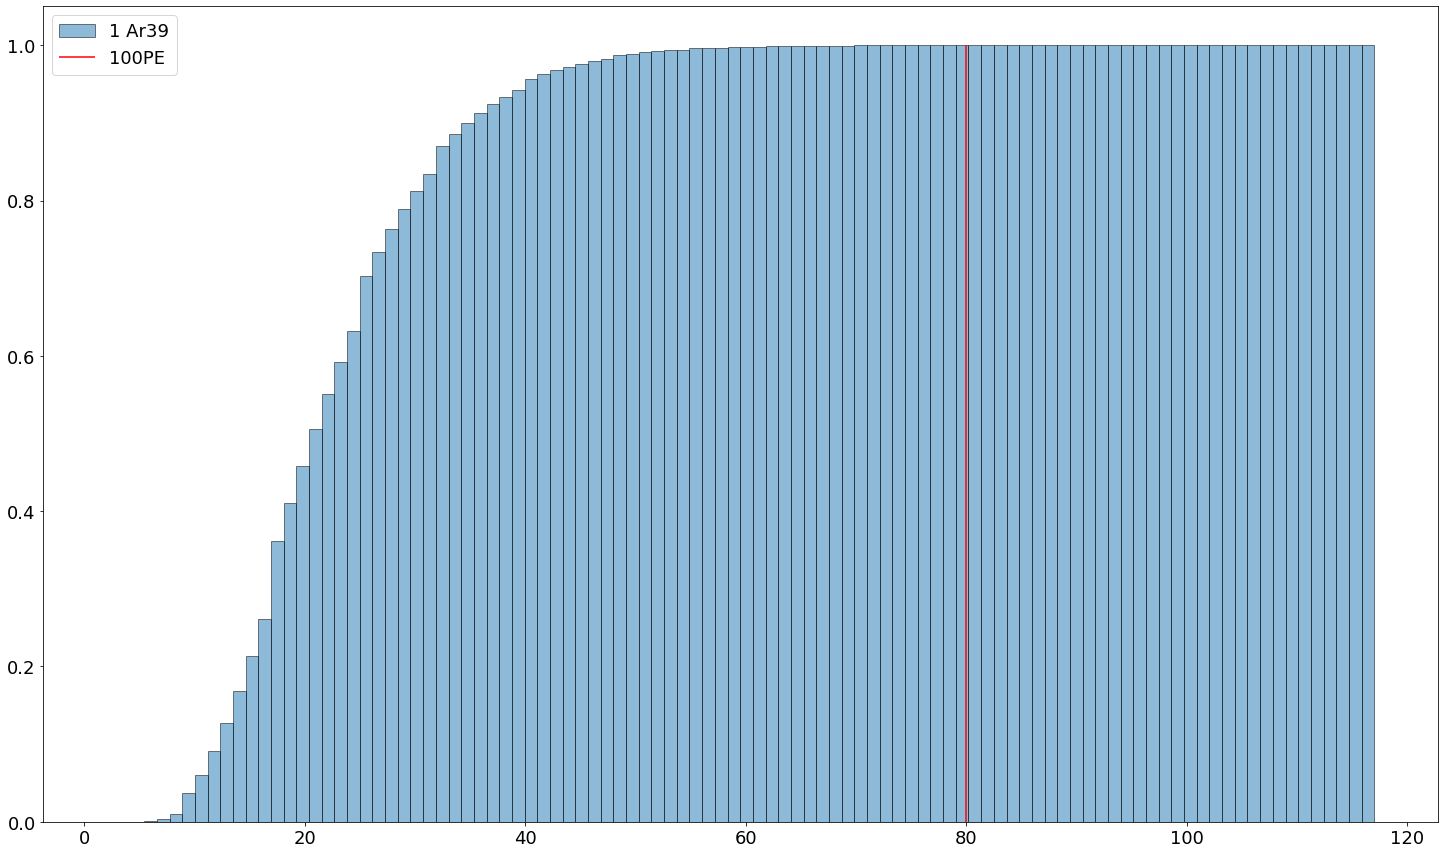

In [17]:
plt.hist(groupby_event_df7.pedetected, bins=100, label="1 Ar39", density=True, cumulative=True, edgecolor='k', alpha=alpha)
plt.vlines(x=80, ymin=0, ymax=1, label="100PE", colors='r')
plt.text(40, .5, "")
plt.legend()
plt.show()

In [20]:
len(groupby_event_df7[groupby_event_df7.pedetected<80])/len(groupby_event_df7)

0.9999467431198767

6021263